<a href="https://colab.research.google.com/github/Arief5757/Bengkel-Koding/blob/main/Preprosesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
file_path = "ObesityDataSet.csv"
df = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama dan informasi umum
head = df.head()
info = df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [2]:
# Ubah semua nilai string numerik menjadi float kalau bisa
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except:
        pass  # kolom tetap object karena memang kategori
# Cek kolom mana saja yang bertipe object (kategori)
kategori_cols = df.select_dtypes(include="object").columns

# Tangani missing value dulu (opsional, di sini pakai isian 'Unknown')
df[kategori_cols] = df[kategori_cols].fillna('Unknown')

In [3]:
# Ubah kategori ke angka menggunakan Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in kategori_cols:
    df[col] = le.fit_transform(df[col])

# Cek hasilnya
print(df.head())

info = df.info()

    Age  Gender  Height  Weight  CALC  FAVC  FCVC  NCP  SCC  SMOKE  CH2O  \
0   404       1     291     947     5     2   167  479    2      2   545   
1   404       1      27     875     3     2   798  479    3      3  1253   
2   697       2    1285    1082     2     2   167  479    2      2   545   
3  1012       2    1285    1340     2     2   798  479    2      2   545   
4   578       2    1182    1388     3     2   167    0    2      2   545   

   family_history_with_overweight   FAF  TUE  CAEC  MTRANS  NObeyesdad  
0                               3     0  832     3       4           1  
1                               3  1180    0     3       4           1  
2                               3  1063  832     3       4           1  
3                               2  1063    0     3       6           5  
4                               2     0    0     3       4           6  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns)

In [4]:
# Cek jumlah missing values sebelum ditangani
print("Jumlah missing values sebelum ditangani:")
print(df.isnull().sum())

Jumlah missing values sebelum ditangani:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [5]:
# Tangani missing values
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
    else:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

# Cek kembali setelah penanganan
print("\nJumlah missing values setelah ditangani:")
print(df.isnull().sum())


Jumlah missing values setelah ditangani:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


<ipython-input-5-37be1b380b82>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [6]:
# 1. Tampilkan tipe data awal
print("Tipe data awal:")
print(df.dtypes)

Tipe data awal:
Age                               int64
Gender                            int64
Height                            int64
Weight                            int64
CALC                              int64
FAVC                              int64
FCVC                              int64
NCP                               int64
SCC                               int64
SMOKE                             int64
CH2O                              int64
family_history_with_overweight    int64
FAF                               int64
TUE                               int64
CAEC                              int64
MTRANS                            int64
NObeyesdad                        int64
dtype: object


In [7]:
# 2. Normalisasi kolom kategorikal: hapus spasi, lowercase
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

In [8]:
# 3. Lihat nilai unik pada kolom kategorikal → deteksi kemungkinan error
print("\nNilai unik pada kolom kategorikal:")
for col in categorical_cols:
    unique_vals = df[col].unique()
    print(f"{col}: {unique_vals}")


Nilai unik pada kolom kategorikal:


In [9]:
print("Missing values per kolom:")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing': missing, 'Missing (%)': missing_percent})
print(missing_df[missing_df['Missing'] > 0])


Missing values per kolom:
Empty DataFrame
Columns: [Missing, Missing (%)]
Index: []


In [10]:
# Daftar nilai yang sering dianggap error
error_like_values = ['?', '??', 'unknown', 'na', 'n/a', '-', '--', 'none', 'nan']

# Cek nilai-nilai error di setiap kolom
print("\nDeteksi nilai error di setiap kolom:")
for col in df.columns:
    if df[col].dtype == 'object':
        values = df[col].astype(str).str.lower().str.strip()
        found = values[values.isin(error_like_values)]
        if not found.empty:
            print(f"{col}: ditemukan {len(found)} nilai error")



Deteksi nilai error di setiap kolom:


In [11]:
import numpy as np
# 4. Tangani nilai 'error' atau entri tidak valid → contoh manual
# Misalnya jika ada '??', 'unknown', 'na' dsb.
error_like_values = ['?', '??', 'unknown', 'na', 'n/a', '-', '--', 'none', 'nan']

for col in df.columns:
    df[col] = df[col].replace(error_like_values, np.nan)



In [12]:
# 5. Jika ada kolom numerik salah tipe (object padahal angka), coba konversi
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='ignore')
        except:
            pass  # biarkan tetap string jika gagal konversi

In [13]:
# 6. Ulangi imputasi missing values jika error sudah diubah jadi NaN
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)


In [14]:
# Daftar nilai yang sering dianggap error
error_like_values = ['?', '??', 'unknown', 'na', 'n/a', '-', '--', 'none', 'nan']

# Cek nilai-nilai error di setiap kolom
print("\nDeteksi nilai error di setiap kolom:")
for col in df.columns:
    if df[col].dtype == 'object':
        values = df[col].astype(str).str.lower().str.strip()
        found = values[values.isin(error_like_values)]
        if not found.empty:
            print(f"{col}: ditemukan {len(found)} nilai error")


Deteksi nilai error di setiap kolom:


In [15]:
print("\nPenanganan error selesai. Cek ringkasan:")
print(df.info())


Penanganan error selesai. Cek ringkasan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Age                             2111 non-null   int64
 1   Gender                          2111 non-null   int64
 2   Height                          2111 non-null   int64
 3   Weight                          2111 non-null   int64
 4   CALC                            2111 non-null   int64
 5   FAVC                            2111 non-null   int64
 6   FCVC                            2111 non-null   int64
 7   NCP                             2111 non-null   int64
 8   SCC                             2111 non-null   int64
 9   SMOKE                           2111 non-null   int64
 10  CH2O                            2111 non-null   int64
 11  family_history_with_overweight  2111 non-null   int64
 12  FAF                 

In [16]:
import pandas as pd

# Assuming your DataFrame is named 'df'
duplicates = df.apply(lambda x: x.duplicated().sum())
print(duplicates)

Age                                716
Gender                            2107
Height                             548
Weight                             592
CALC                              2105
FAVC                              2107
FCVC                              1302
NCP                               1473
SCC                               2107
SMOKE                             2107
CH2O                               847
family_history_with_overweight    2107
FAF                                924
TUE                                980
CAEC                              2105
MTRANS                            2104
NObeyesdad                        2104
dtype: int64


In [17]:
# 1. Mengidentifikasi duplikasi per kolom
duplikat_per_kolom = df.apply(lambda x: x.duplicated().sum())
print("\nDuplikasi per Kolom:")
print(duplikat_per_kolom)



Duplikasi per Kolom:
Age                                716
Gender                            2107
Height                             548
Weight                             592
CALC                              2105
FAVC                              2107
FCVC                              1302
NCP                               1473
SCC                               2107
SMOKE                             2107
CH2O                               847
family_history_with_overweight    2107
FAF                                924
TUE                                980
CAEC                              2105
MTRANS                            2104
NObeyesdad                        2104
dtype: int64


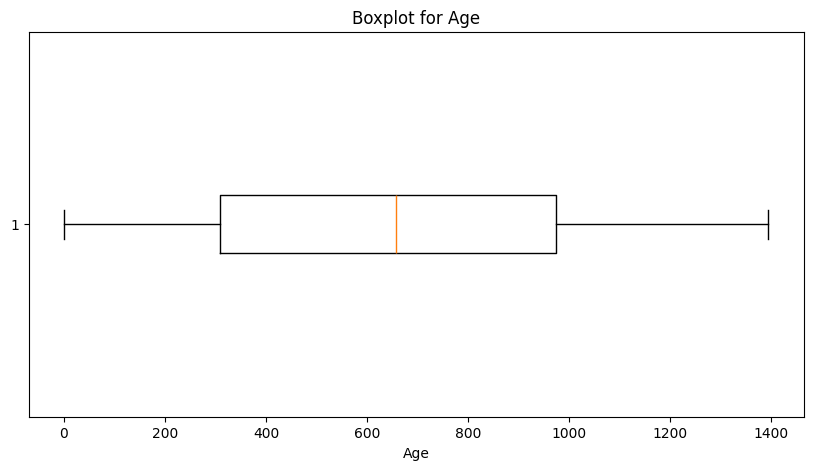

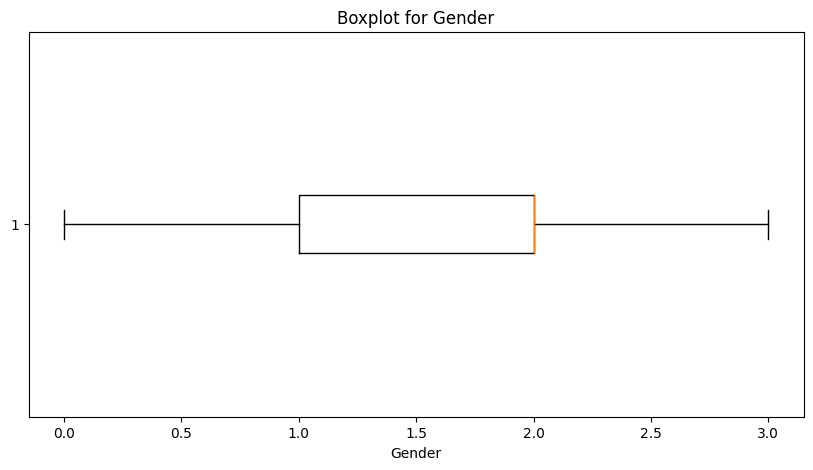

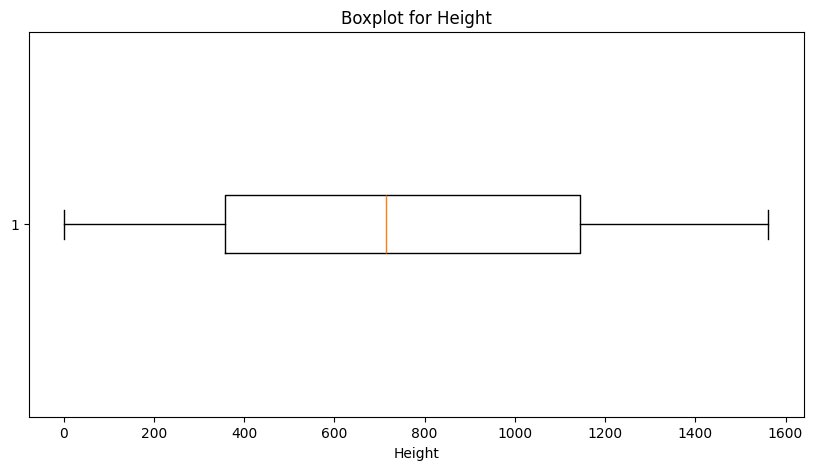

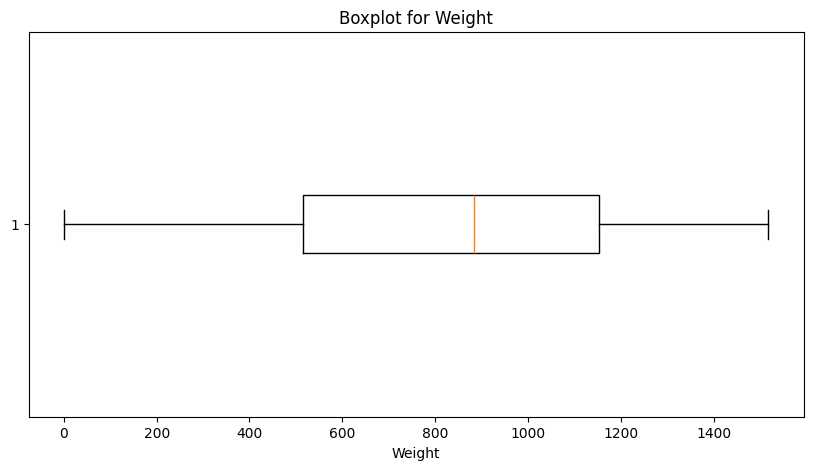

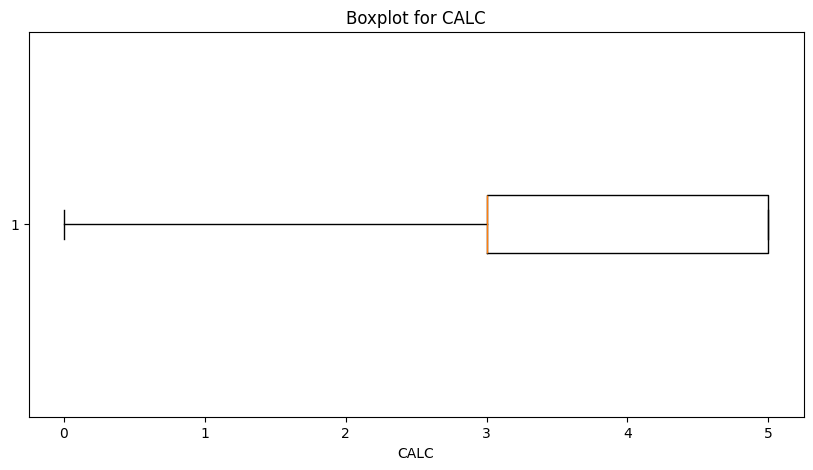

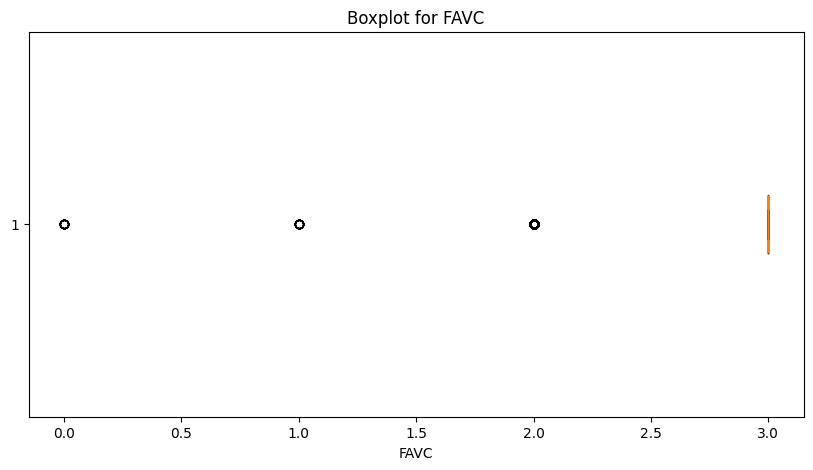

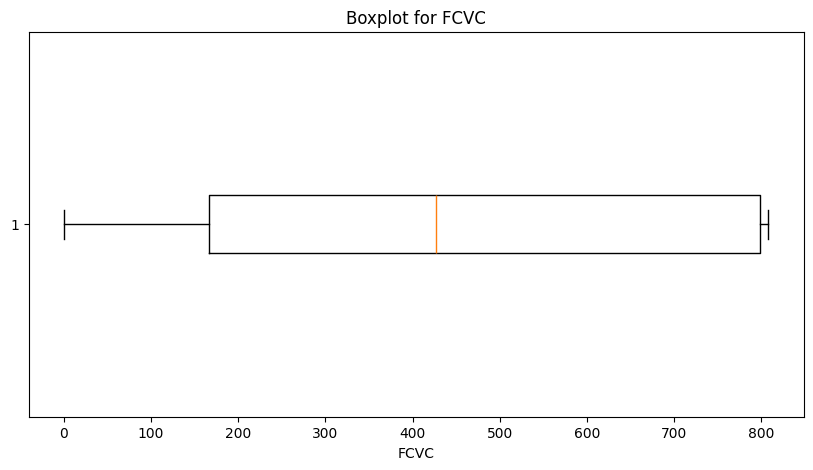

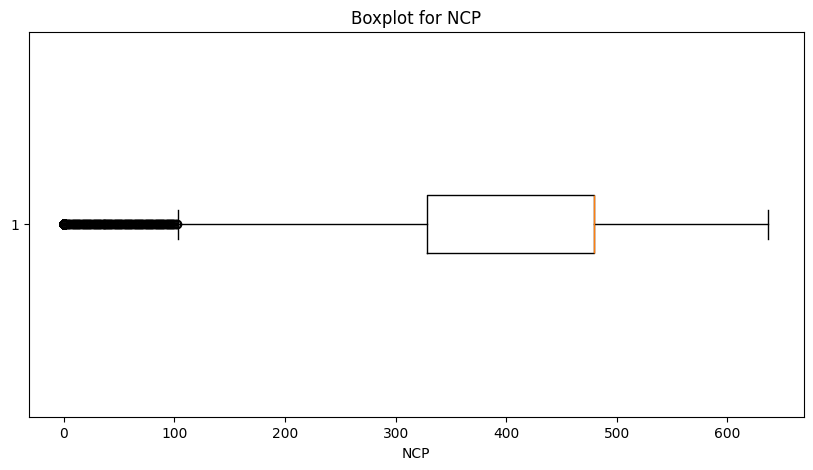

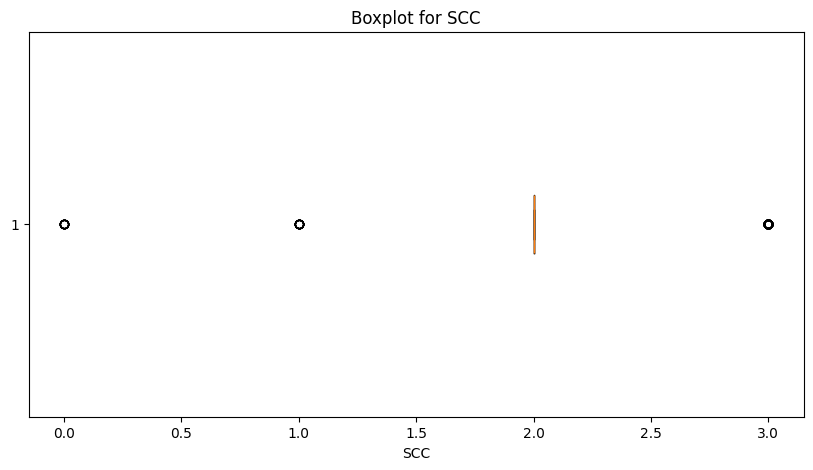

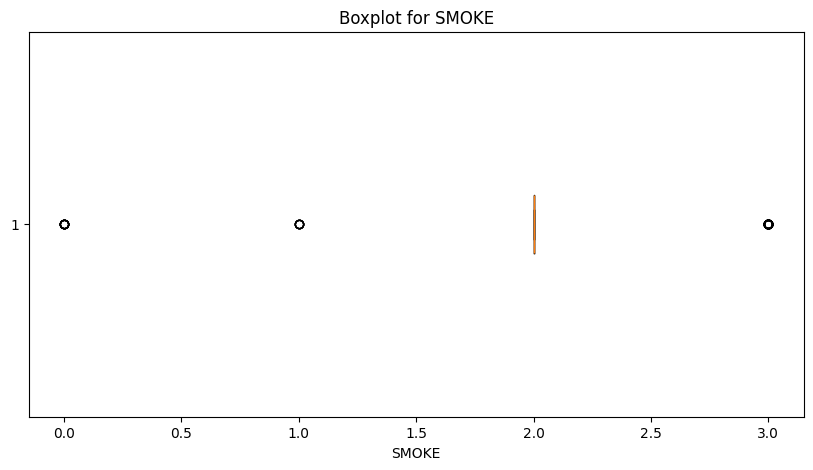

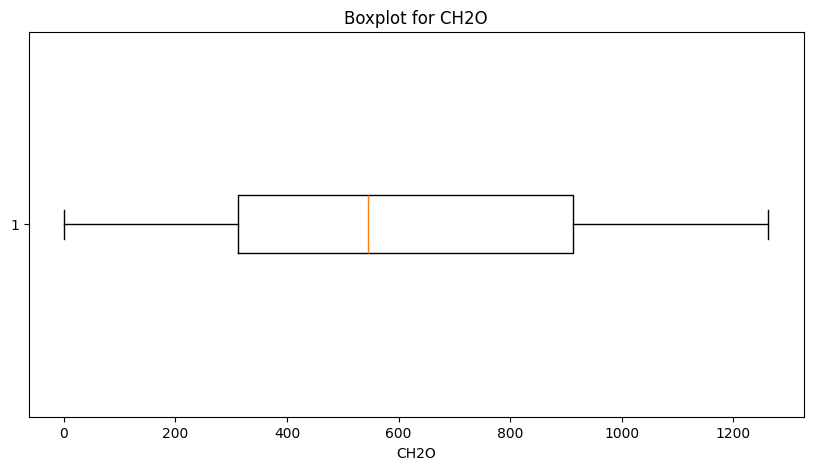

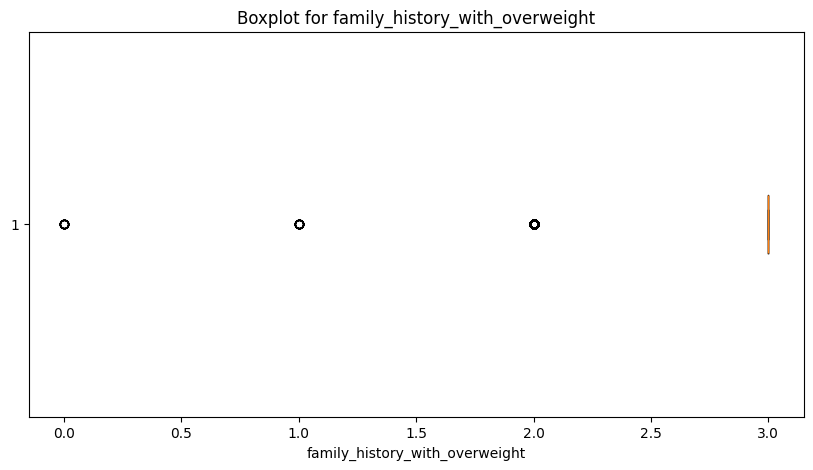

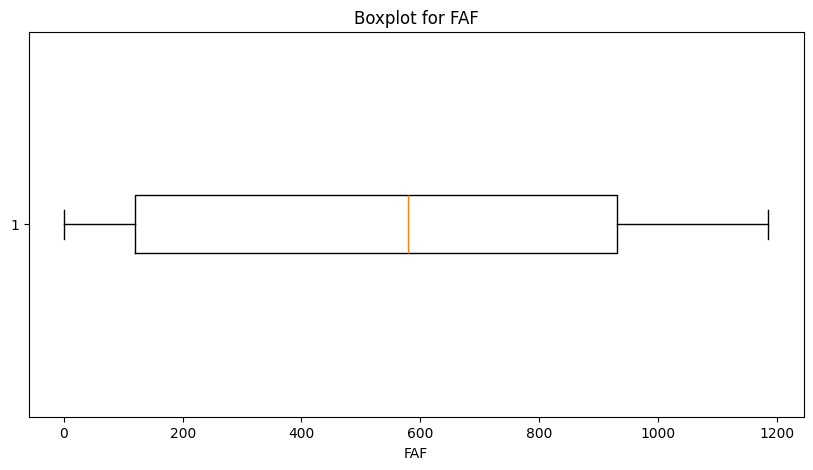

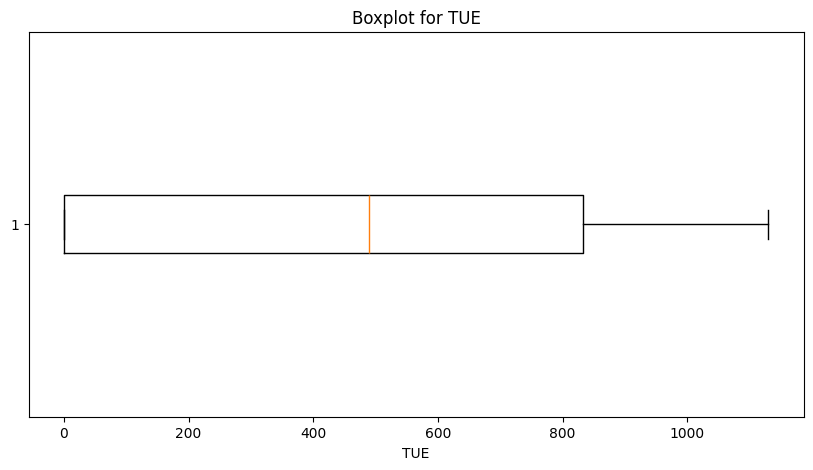

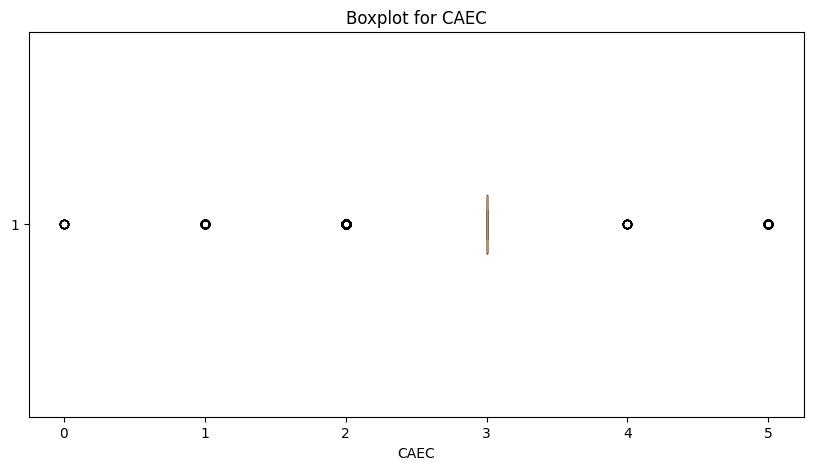

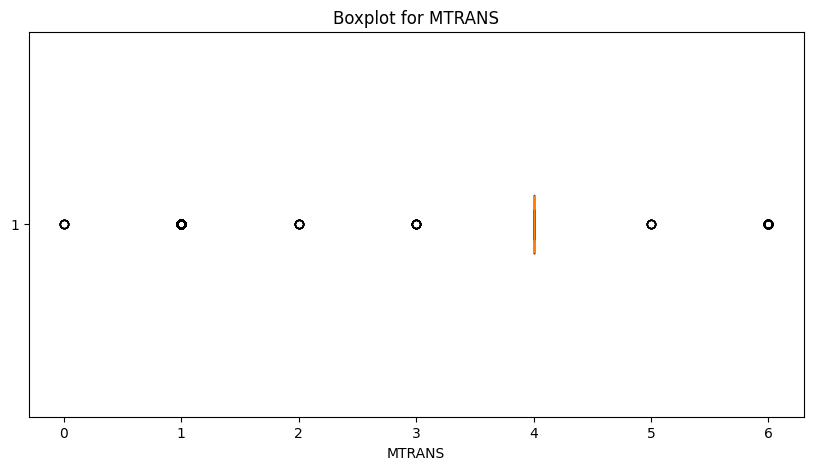

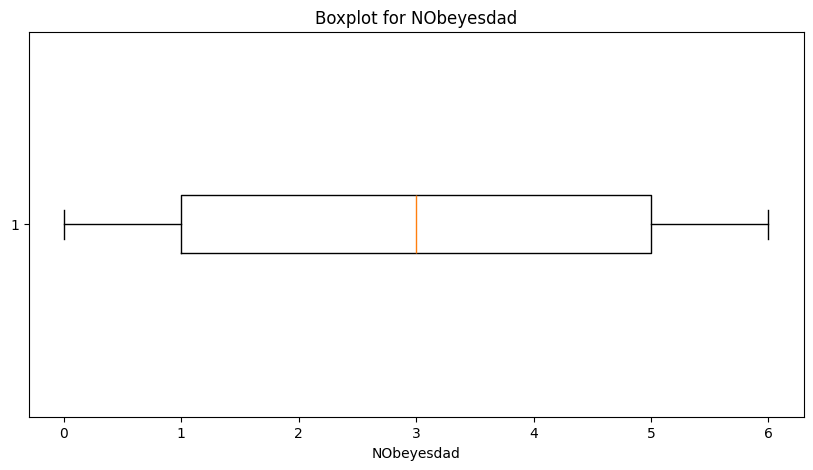

In [18]:
import matplotlib.pyplot as plt

# Pilih hanya kolom numerik
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Buat boxplot untuk setiap kolom numerik
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()

In [19]:
# Tangani outlier menggunakan metode IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)  # Kuartil pertama
    Q3 = df[col].quantile(0.75)  # Kuartil ketiga
    IQR = Q3 - Q1  # Rentang interkuartil

    # Tentukan batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ganti outlier dengan nilai batas bawah atau atas
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

In [20]:
print("Tipe data pada masing-masing kolom:")
print(df.dtypes)

Tipe data pada masing-masing kolom:
Age                                 int64
Gender                              int64
Height                              int64
Weight                              int64
CALC                                int64
FAVC                              float64
FCVC                                int64
NCP                               float64
SCC                               float64
SMOKE                             float64
CH2O                                int64
family_history_with_overweight    float64
FAF                                 int64
TUE                                 int64
CAEC                              float64
MTRANS                            float64
NObeyesdad                          int64
dtype: object


In [21]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Encode setiap kolom kategorikal
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print("Data setelah kategori diubah menjadi numerik:")
print(df.head())

Data setelah kategori diubah menjadi numerik:
    Age  Gender  Height  Weight  CALC  FAVC  FCVC     NCP  SCC  SMOKE  CH2O  \
0   404       1     291     947     5   3.0   167  479.00  2.0    2.0   545   
1   404       1      27     875     3   3.0   798  479.00  2.0    2.0  1253   
2   697       2    1285    1082     2   3.0   167  479.00  2.0    2.0   545   
3  1012       2    1285    1340     2   3.0   798  479.00  2.0    2.0   545   
4   578       2    1182    1388     3   3.0   167  102.75  2.0    2.0   545   

   family_history_with_overweight   FAF  TUE  CAEC  MTRANS  NObeyesdad  
0                             3.0     0  832   3.0     4.0           1  
1                             3.0  1180    0   3.0     4.0           1  
2                             3.0  1063  832   3.0     4.0           1  
3                             3.0  1063    0   3.0     4.0           5  
4                             3.0     0    0   3.0     4.0           6  


In [22]:
print("Tipe data pada masing-masing kolom:")
print(df.dtypes)

Tipe data pada masing-masing kolom:
Age                                 int64
Gender                              int64
Height                              int64
Weight                              int64
CALC                                int64
FAVC                              float64
FCVC                                int64
NCP                               float64
SCC                               float64
SMOKE                             float64
CH2O                                int64
family_history_with_overweight    float64
FAF                                 int64
TUE                                 int64
CAEC                              float64
MTRANS                            float64
NObeyesdad                          int64
dtype: object


In [23]:
# Analisis korelasi untuk fitur numerik
correlation = df[numerical_cols].corrwith(df['NObeyesdad'])
print("Korelasi fitur numerik dengan target:")
print(correlation)

Korelasi fitur numerik dengan target:
Age                               0.267406
Gender                            0.029576
Height                            0.034405
Weight                            0.145332
CALC                             -0.129207
FAVC                                   NaN
FCVC                              0.002544
NCP                              -0.101276
SCC                                    NaN
SMOKE                                  NaN
CH2O                              0.106514
family_history_with_overweight         NaN
FAF                              -0.129582
TUE                              -0.061675
CAEC                                   NaN
MTRANS                                 NaN
NObeyesdad                        1.000000
dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [24]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Pastikan semua fitur sudah numerik
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']
mi = mutual_info_classif(X, y, discrete_features='auto')
mi_series = pd.Series(mi, index=X.columns)
print(mi_series.sort_values(ascending=False))


Weight                            1.212102
Age                               0.583654
Height                            0.418684
FCVC                              0.372972
CH2O                              0.298473
TUE                               0.283749
FAF                               0.282162
NCP                               0.229100
Gender                            0.184096
CALC                              0.116231
FAVC                              0.018466
MTRANS                            0.006431
CAEC                              0.005082
family_history_with_overweight    0.000000
SCC                               0.000000
SMOKE                             0.000000
dtype: float64


Fitur dengan nilai MI tinggi (misal > 0.1) seperti Weight, FCVC, Age, Gender, CAEC, Family history, TUE, NCP, CH2O sebaiknya dimasukkan ke model.

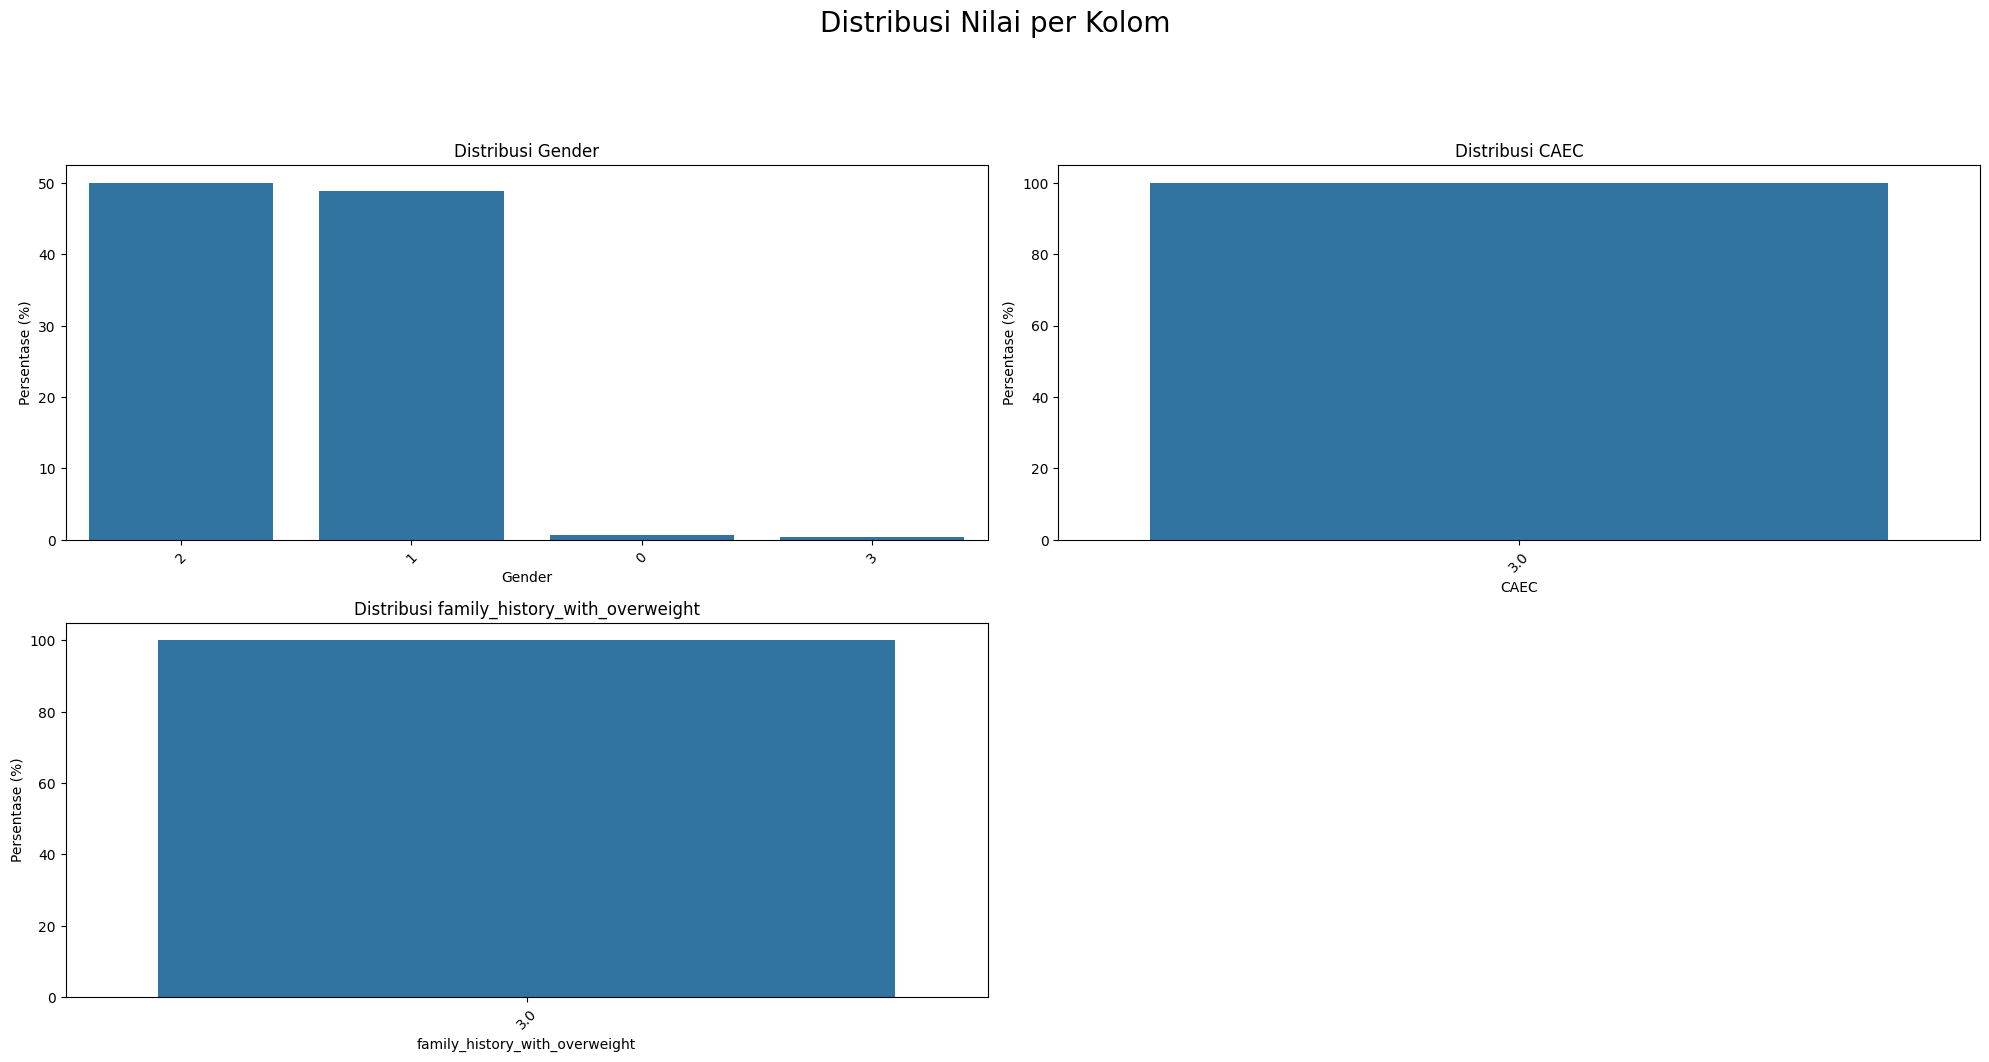

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_check = ['Gender', 'CAEC', 'family_history_with_overweight']

# Buat figure besar untuk semua subplot
plt.figure(figsize=(20, 25))
plt.suptitle('Distribusi Nilai per Kolom', fontsize=20)

for i, col in enumerate(columns_to_check, 1):
    plt.subplot(5, 2, i)
    value_counts = df[col].value_counts(normalize=True) * 100
    sns.barplot(x=value_counts.index.astype(str), y=value_counts.values)
    plt.title(f'Distribusi {col}')
    plt.ylabel('Persentase (%)')
    plt.xlabel(col)
    plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


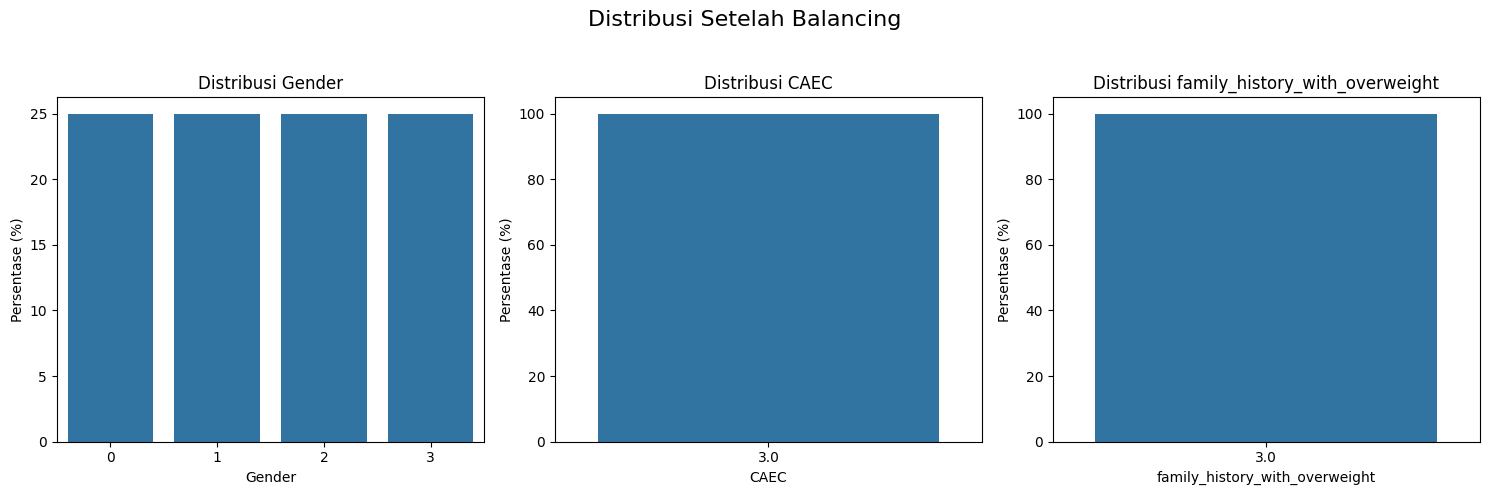

In [26]:
from sklearn.utils import resample



# Kolom yang ingin diseimbangkan
cols_to_balance = ['Gender', 'CAEC', 'family_history_with_overweight']

# Hitung kombinasi unik dan jumlahnya
grouped = df.groupby(cols_to_balance)
max_count = grouped.size().max()

# Lakukan oversampling per kombinasi
balanced_list = []
for combo, group in grouped:
    if len(group) < max_count:
        upsampled = resample(group, replace=True, n_samples=max_count, random_state=42)
    else:
        upsampled = group
    balanced_list.append(upsampled)

# Gabungkan semua
df_balanced = pd.concat(balanced_list)

# ✅ Visualisasi hasil balancing
plt.figure(figsize=(15, 5))
plt.suptitle("Distribusi Setelah Balancing", fontsize=16)

for i, col in enumerate(cols_to_balance):
    plt.subplot(1, 3, i + 1)
    distribusi = df_balanced[col].value_counts(normalize=True) * 100
    sns.barplot(x=distribusi.index.astype(str), y=distribusi.values)
    plt.title(f'Distribusi {col}')
    plt.ylabel('Persentase (%)')
    plt.xlabel(col)
    plt.xticks(rotation=0)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



